In [1]:
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')
import cv2

In [2]:
path = '../img/person_dog.jpg'
img = cv2.imread(path)
img_tensor = np.expand_dims(img, axis=0)
im_draw = img.copy()
print(im_draw.shape)

(640, 960, 3)


In [3]:
print('Loading model...')
detector = hub.load("https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512_kpts/1")
print('Model loaded')

Loading model...
Model loaded


In [4]:
print('Analyzing image...')
result = detector(img_tensor)
print('Image analyzed')

Analyzing image...
Image analyzed


In [5]:
def get_lbl(curr):
    res = result['detection_classes'].numpy()[0][curr]
    if res == 1:
        return "Person"
    elif res == 18:
        return "Doggo"
    else:
        return f'Class #: {str(res)}'

In [10]:
def bound_label(width, height, det_box, det_idx):
    x1, y1 = int(det_box[0][1] * width), int(det_box[0][0] * height)
    x2, y2 = int(det_box[0][3] * width), int(det_box[0][2] * height)

    _ = cv2.rectangle(im_draw,
                  (x1, y1),
                  (x2, y2),
                  (0, 255, 0),
                  thickness=2)
    _ = cv2.putText(im_draw,
                      get_lbl(det_idx),
                      (int((x2 + x1) / 2), y1),
                      cv2.FONT_HERSHEY_SIMPLEX,
                      1, (0, 255, 0), 3)

In [11]:
# only classify confident images
# first step for 
res_scores = result['detection_scores'].numpy()[0]
# threshold (only take classifications with this or greater confidence
tresh = 0.6
res_scores_confident = np.extract(res_scores > tresh, res_scores)

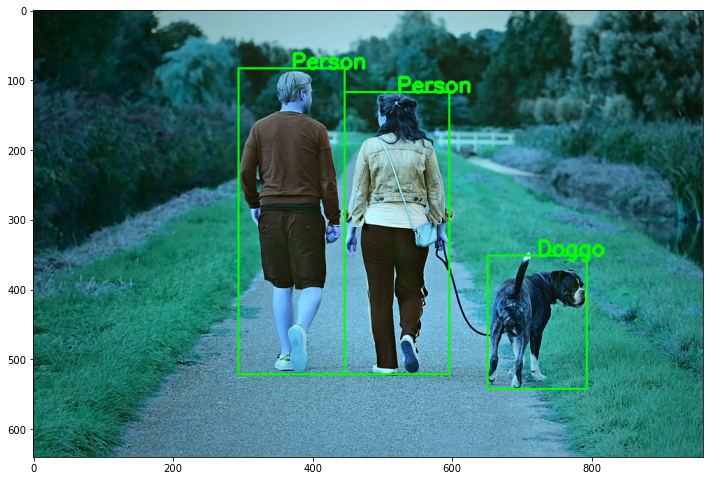

In [12]:
# reset image
im_draw = img.copy()

width = im_draw.shape[1]
height = im_draw.shape[0]

boxes = result['detection_boxes'].numpy()

for det_idx in range(len(res_scores_confident)):
    box = boxes[:, det_idx, :]
    bound_label(width, height, box, det_idx)

plt.figure(figsize=(12,16))
plt.imshow(im_draw)
plt.show()

# todo: books!